In [335]:
%matplotlib inline
import pandas as pd
import scipy as sp
import thinkstats2 
import thinkplot
import numpy as np

In [218]:
#Here I open the files
coaches_prop=pd.read_csv("basketball_coaches.csv")
basketball_teams_prop=pd.read_csv("basketball_teams.csv")
coach_awards_prop=pd.read_csv("basketball_awards_coaches.csv")

In [219]:
#I need year, won and games columns to be numeric to make mathematical operations on them.
basketball_teams=basketball_teams_prop[["year","won","games"]].apply(pd.to_numeric)

In [301]:
#Won is divided by games columns to find the winning ratio of teams
basketball_teams["Value"]=basketball_teams["won"]/basketball_teams["games"]

In [302]:
#team IDs are added to basketball_teams dataframe
basketball_teams["tmID"]=basketball_teams_prop["tmID"]

In [303]:
basketball_teams

,year,won,games,Value,tmID
0,1946,22,60,0.366667,BOS
1,1946,39,61,0.639344,CHS
2,1946,30,60,0.500000,CLR
3,1946,20,60,0.333333,DTF
4,1946,33,60,0.550000,NYK
5,1946,35,60,0.583333,PHW
6,1946,15,60,0.250000,PIT
7,1946,28,60,0.466667,PRO
8,1946,38,61,0.622951,STB
9,1946,22,60,0.366667,TRH


In [304]:
coach_awards=coach_awards_prop[["year","coachID"]]  #new dataframe with columns year and coachID from coach_awards file
coaches=coaches_prop[["coachID","year","tmID"]]   #new dataframe with coachID, year and tmID columns from coach file
merged_coach=pd.merge(coach_awards, coaches)    #coach_awards and coaches dataframes are merged in order to see which team the coaches were training when they were awarded 
coach_award_team=pd.merge(merged_coach,basketball_teams)   #all 3 dataframes are merged to get the win ratio when a coach was awarded

In [308]:
coach_award_team

,year,coachID,tmID,won,games,Value
0,1962,gallaha01,STL,48,80,0.600000
1,1963,hannual01,SFW,48,80,0.600000
2,1964,auerbre01,BOS,62,80,0.775000
3,1965,schaydo01,PHI,55,80,0.687500
4,1966,kerrjo01,CHI,33,81,0.407407
5,1967,cazzevi01,PTP,54,78,0.692308
6,1967,gueriri01,STL,56,82,0.682927
7,1968,hannual01,OAK,60,78,0.769231
8,1968,shuege01,BAL,57,82,0.695122
9,1969,sharmbi01,LAS,43,84,0.511905


In [309]:
coach_teams=pd.merge(coaches,basketball_teams)  #coaches and basketbal_teams are merged to see the all win ratios
max_value=coach_teams.groupby("year").max()["Value"]  #coach_teams dataframe is groupedby year and max win ratio of those years
year_maxvalue=pd.DataFrame({'year':max_value.index, 'max_value':max_value.values})  
year_value=coach_award_team[["year","Value"]]   
year_value_maxvalue=pd.merge(year_value,year_maxvalue)   #made a new dataframe from years, awarded win ratio and max win ratio of those years

In [314]:
year_value_maxvalue

,year,Value,max_value
0,1962,0.600000,0.725000
1,1963,0.600000,0.737500
2,1964,0.775000,0.775000
3,1965,0.687500,0.687500
4,1966,0.407407,0.839506
5,1967,0.692308,0.756098
6,1967,0.682927,0.756098
7,1968,0.769231,0.769231
8,1968,0.695122,0.769231
9,1969,0.511905,0.731707


In [315]:
year_value_maxvalue["difference"]=year_value_maxvalue["max_value"]-year_value_maxvalue["Value"]   
#i took the difference so if the max win ratio awarded that year the difference should be zero

In [316]:
year_value_maxvalue

,year,Value,max_value,difference
0,1962,0.600000,0.725000,0.125000
1,1963,0.600000,0.737500,0.137500
2,1964,0.775000,0.775000,0.000000
3,1965,0.687500,0.687500,0.000000
4,1966,0.407407,0.839506,0.432099
5,1967,0.692308,0.756098,0.063790
6,1967,0.682927,0.756098,0.073171
7,1968,0.769231,0.769231,0.000000
8,1968,0.695122,0.769231,0.074109
9,1969,0.511905,0.731707,0.219803


In [428]:
 #to get rid of inf values because there were values from games column with value of zero 
year_value_maxvalue=year_value_maxvalue.replace([np.inf, -np.inf], np.nan)  #replacing inf values with nan
year_value_maxvalue.replace([np.inf, -np.inf], np.nan).dropna(subset=["Value", "max_value"], how="all")  #dropping nan values

,year,Value,max_value,difference
0,1962,0.600000,0.725000,0.125000
1,1963,0.600000,0.737500,0.137500
2,1964,0.775000,0.775000,0.000000
3,1965,0.687500,0.687500,0.000000
4,1966,0.407407,0.839506,0.432099
5,1967,0.692308,0.756098,0.063790
6,1967,0.682927,0.756098,0.073171
7,1968,0.769231,0.769231,0.000000
8,1968,0.695122,0.769231,0.074109
9,1969,0.511905,0.731707,0.219803


In [325]:
year_value_maxvalue["Value"].min(), year_value_maxvalue["max_value"].min()

(0.4074074074074074, 0.6463414634146342)

In [326]:
year_value_maxvalue["Value"].max(), year_value_maxvalue["max_value"].max()

(0.8780487804878049, 0.8780487804878049)

In [329]:
year_value_maxvalue["Value"].var(), year_value_maxvalue["max_value"].var()

(0.009185504948876985, 0.0021652230978033565)

In [330]:
year_value_maxvalue["Value"].std(), year_value_maxvalue["max_value"].std()

(0.0958410400031061, 0.04653195781184536)

In [331]:
year_value_maxvalue["Value"].mean(), year_value_maxvalue["max_value"].mean()

(0.6580276890022291, 0.7656029341530696)

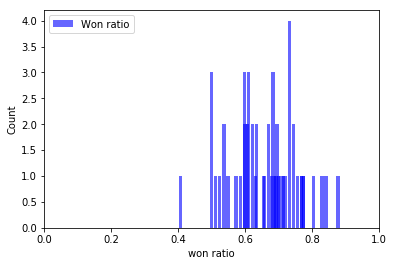

In [407]:
Value = thinkstats2.Hist(year_value_maxvalue.Value, label='Won ratio')
width = 0.01
thinkplot.Hist(Value, width=width, color="blue")
thinkplot.Config(xlabel='won ratio', ylabel='Count', xlim=[0, 1])

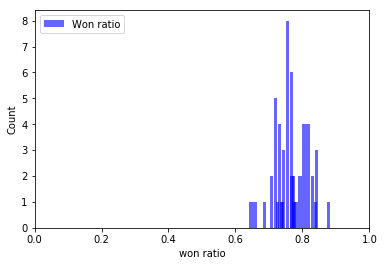

In [413]:
max_value = thinkstats2.Hist(year_value_maxvalue.max_value, label='Won ratio')
width = 0.01
thinkplot.Hist(max_value, width=width, color="blue")
thinkplot.Config(xlabel='won ratio', ylabel='Count', xlim=[0, 1])

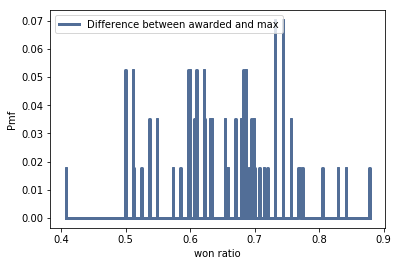

In [414]:
value_pmf = thinkstats2.Pmf(year_value_maxvalue.Value, label='Difference between awarded and max')
thinkplot.Pmf(value_pmf)
thinkplot.Config(xlabel='won ratio', ylabel='Pmf')

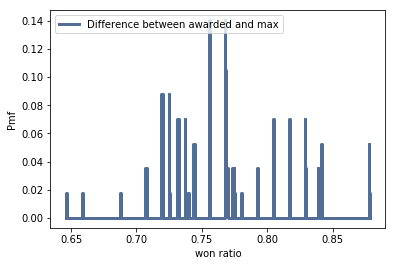

In [415]:
max_value_pmf = thinkstats2.Pmf(year_value_maxvalue.max_value, label='Difference between awarded and max')
thinkplot.Pmf(max_value_pmf)
thinkplot.Config(xlabel='won ratio', ylabel='Pmf')

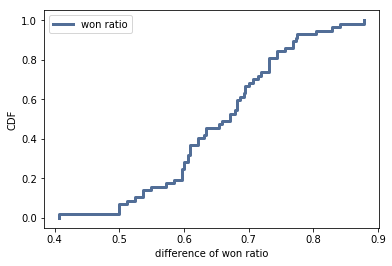

In [417]:
Value_cdf = thinkstats2.Cdf(year_value_maxvalue.Value, label='won ratio')
thinkplot.Cdf(Value_cdf)
thinkplot.Config(xlabel='difference of won ratio', ylabel='CDF', loc='upper left')

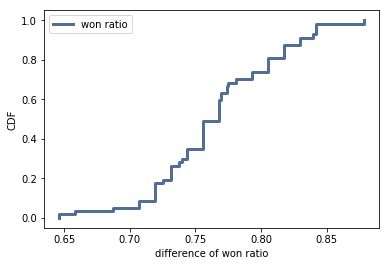

In [418]:
max_value_cdf = thinkstats2.Cdf(year_value_maxvalue.max_value, label='won ratio')
thinkplot.Cdf(max_value_cdf)
thinkplot.Config(xlabel='difference of won ratio', ylabel='CDF', loc='upper left')

In [419]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [420]:
#correlation of winning ratios
cleaned = year_value_maxvalue.dropna(subset=['Value', 'max_value'])
data = cleaned.Value.values, cleaned.max_value.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.165